# How well do jobs & skills pay for Data Analytics ?

In [9]:
import ast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df=pd.read_csv(r"C:\Users\91706\Data Analytics Practice\databases\python\Job_Data_Analysis.csv")

In [11]:
#Data Cleaning
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [15]:
df_US=df[(df['job_country'] == 'United States')].dropna(subset='salary_year_avg')

In [16]:
job_titles=df_US['job_title_short'].value_counts().index[:6].tolist()
job_titles

['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Engineer',
 'Senior Data Analyst']

In [17]:
df_US_top6 = df_US[df_US['job_title_short'].isin(job_titles)]

In [23]:
job_order=df_US_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

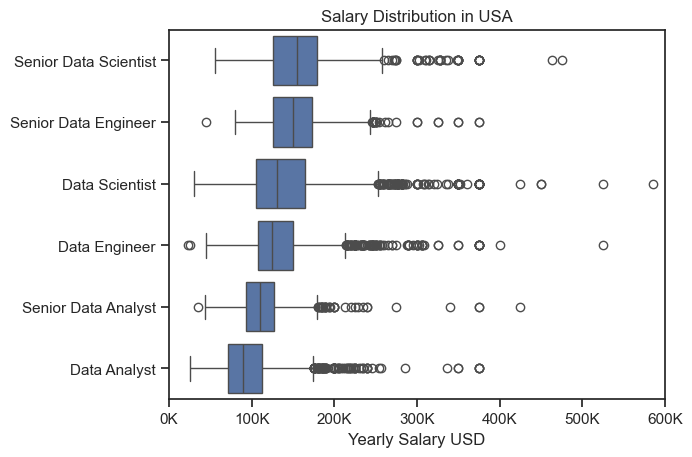

In [24]:
sns.boxplot(data=df_US_top6,x='salary_year_avg',y='job_title_short',order=job_order)
sns.set_theme(style='ticks')

plt.title('Salary Distribution in USA')
plt.xlabel('Yearly Salary USD')
plt.ylabel('')
plt.xlim(0,600000)
ticks_x=plt.FuncFormatter(lambda y,_: f'{int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()